# ECE 5470 Lab 1 Report


## by Cynthia Li (xl827)


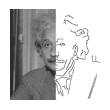

ein.vx
<scaled size: (256 x 256) >


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from v4 import vx
from v4 import vd

vd.dispmvx("ein.vx", size=0.3, capt="ein.vx")


### A. General Image Manipulation
1.	What are the pixel coordinates of Albert’s right eye?  
    The eye extends from [99.21, 103.38] to [113.63, 103.69] (inner and outer corner). Then [106.21, 98.23] to [108.69, 98.13] is the about flat part of the eyelids, [102.92, 105.86] to [109.10, 105.86] is the about flat part of the lower bottom of the right eye. [112.40, 100.50] marks the turn point of the inner corner.
    
2.	How did you make this measurement?  
    First I marked the boundary of the right eye. During the Process, I specifically locate points on where I think the arc has a noticiable change that should be put down to specify the eye's feature. Then I go back to locate the coordinates of each of the points I marked. They can specify the approximate length, height, arc of the eye.

3.	What is the width of Albert’s mustache?   
    45.77

4.	What are the main issues in making distance measurements on images? Consider and comment on the following: (a) Mouse Control, (b) Feature visibility, (c) Image Size, (e) Question ambiguity.  

    Personally, I think the question ambiguity is the biggest problem. This particular image's size and definition is good enough to see the features. With the zoom in/out, the annotation can be performed with the mouse easily as well. However, it was hard for me to know what the question really wants for sure. For example, in Q1, nothing is specified to define the right eye. Is it just the center of the eye, or the length and height, or should I include any turning points on the arc of the eye as well? Then in Q2, I wasn't sure if I should count the mustache in the right half of the given image for measurement as well. 



### B. Grey Level Image manipulation

1.	Window=2 Level=128. what type of image do you observe? what is a useful purpose for this setting?
    
    It's binary image (only black and white). This setting enhanced the contrast, and therefore, we can see the separation of features from its background.

2.	Window=512 Level=128. what is the range of displayed image pixel values with this setting?
    
    window = H-L, level = (L + H) / 2
    
    L = -128, H = 384
    
    The range is from -128 to 384
    
3.	Window=512, Level=0. what is the range of displayed image pixel values with this setting? 
    
    Same as in 2, L = -256, H = 256
    
    The range is from -256 to 256

### C. Image File Inspection
1.	What is the size (dimensions) of the image in the file girl-grey.vx? How did you find this?
    
    The size of the image is 256 * 256. The vps and vqfile command both give information about the file, and the size is listed.
    The vls command has also given the dimension as 256 * 256 * 1 in the first line of file information.
    
2.  What is the type of the pixels of the image in the file girl-grey.vx? How did you find this?
    
    The pixel type is byte. As vqfile command specifies the main parameters of the image file, I find this value listed under it. 
    
3. On what date was the file girl-grey.vx created? How did you find this?

   The file is created on Friday Aug 12 2022 at 00:48:46. As the lab manual introduced, the vls would provide file history, so I looked the contents returned under the vls command.

4. What is the mean pixel value in the image in girl-grey.vx? How did you find this?

   The mean pixel value is 73.565. As the lab manual suggested, the vps command gives statistics about the image, so I searched the returned information under vps command and find the value.
           

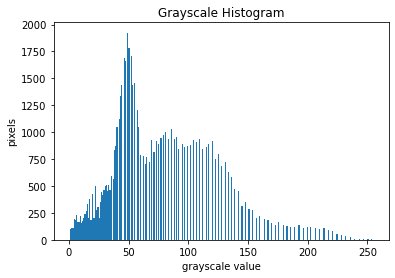

Histogram of girl-grey.vx


In [3]:
# Examples of using the python utilites
# 1. Run this cell to import the image and then
# display the histogram usign the vd.dhist function
img=vx.Vx('girl-grey.vx')
vd.dhist(img, capt='Histogram of girl-grey.vx')

In [4]:
# 1. Run this cell to assess and present information about the image
# using the utility vx.vxsh and linux commands
exec (vx.vxsh( 'vps girl-grey.vx' ))
print (vx.vxshreturn())


 Global Statistics Summary

1 images in file    256 x 256 (0,0)

65536      (65536     ) number of pixels
254        (254       ) maximum pixel value
1          (1         ) minimum pixel value
253        (253       ) range
73.565     (73.565    ) mean pixel value
1816.53    (1816.53   ) variance
42.6207    (42.6207   ) standard deviation
0.917956   (0.917956  ) skewness
3.72903    (3.72903   ) kurtosis



### D. Image Set Display, Pixel Quantization


1.	What does the girl image sequence show?
    
    It shows how the image quality degrades as we decrease the number of colors (the available color map) and depth of color (bpp).
    
2.	What do the image parameters printed in the caption of the image mean?
    
    "Grey" is the number of grey-scale colors or the range of the intensity level applied in the image, "BPP" is bits per pixel, representing the depth of color. The value of bpp would limit the value of "grey" such that bpp = n means it have support a maximum of 2^n colors. Therefore, though grey=10 is less than 16 = 2^4, it still requires a bpp = 4.

3.	At what quantization does degradation in image quality become noticeable?
    
    From grey = 32, bpp = 5 we can start to see some noisy points and the image starts to get a little blurry, but it's from grey = 8, bpp = 3, that we see some feature fade away, such as shading of the walls, the shape of the trees outside the window, and unreal shading on the girl's face.


4.	What is the implication of this observation for image display design? Comment on the number of gray levels you would include in a product for general use and why?

    This observation shows that we need to perserve a bpp of at least 4 in real image display designs to prevent obvious feature loses. If condition allows, it's better to use bpp=5 or higher to show enough details and provide clear images. 
    In a product for general use, I would prefer to use a grey level of 256. It is smooth and clear without any noise points, and gives enough details.


5.	Many home theater systems claim to have a 4000 to 1 contrast ratio or (much) greater. Assuming that this is possible by the image encoding methods used, how is such a large range useful given human visual system limitations?

    The contrast ratio defines the unit difference between the maximum and minimum brightness of the display. Though human eyes may not be able to distinguish the smallest difference, it is really senstive to brightness fluctuation. And because the color produced is associated with the luminance of digital screen, a large contrast ratio is helpful to show a smoother color gradient in display and present a more realistic image to the audience, which is what the theatres are trying to achieve. 


### E. Terminal command and log enhancement
1.	What does the vmath command do?

    The vmath command applies a function or a set of functions to each pixels in the image file. 
    The two functions that we applied: 1). mlog - applies a modified log function that takes special actions on negative values and values from 0-3.

2.	How does the vmath operation affect the visibility of image features? Are some parts of the image easier to see after the log transform? Is it possible to see more or less detail after the transform?

    After the operation, the images' brightness is highly enhanced, some details become clearer but more details are lost. Details of her pupils and the leaves becomes clearer while the flowers, scenery outside the window, the girl's hair, speckles and wrinkles on the girl's face, and the wrinkles on the scarf seem to diminish. 
    It seems possible to see more details in the originally darker parts after the transformation, and lose details in the original lighter parts.
    
3.	If more detail is visible, how is this possible? (consider your answer to question 2) (think carefully)

    This is possible because we were using the mlog and scale function. First, after a log algorithm is applied, the diferrences between high input values (brighter parts) becomes smaller (compacted by log) than the difference between low input values (darker parts) (stretched by log) because the function is concave. Also, the difference between the maximum and minimum is much smaller (originally it was 0-255, now it's 0-5.5 (0-3 is linearly scaled by mlog and now produce positive outputs)). Then after scale, the output value (0-5.5) is now linearly scaled to (0-255). 
    
    The result means that the original lighter parts now have fewer difference (due to log) and becomes brighter (due to scale after log).The original dark parts has more differences (due to log), the differences is further enhanced and becomes more visible as brightness increases (due to scale after log). Therefore, features become visible or invisible are both possible depending on the original color.

### F. Large Image Display

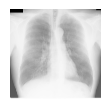

xray.vs logo
<scaled size: (2048 x 2048) >


In [5]:
xray=vx.Vx('xray.vs')
vd.dispmvx(xray, capt='xray.vs logo', size=0.3)



1.	What is the size of the x-ray image?

    The size of the x-ray image is 2048 * 2048 * 1.

2.	What are the window settings?
    
    I used the window setting of window = 4096, level = 4000.

3.	Which interpolation method is the best and why?

   Three commonly used interpolation methods include nearest neighbor interpolation, bilinear interpolation, and bicubic interpolation. Bilinear interpolation weigh the distance from the pixel to its four nearest pixels in diagonal direction for estimation while bicubic uses 16 nearest neighbors. Bilinear interpolation provides a smoother output than the nearest neighbor method, and bicubic method provides the smoothest output and the best interpretation of the image. However, the efficiency of bicubic method can be a disadvantage. Therefore, bilinear and bicubic method are both good in practice depending on the situation that requires it.
      

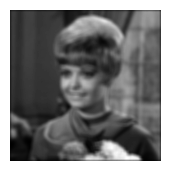

girl-seq.vx image 3
<scaled size: (256 x 256) >


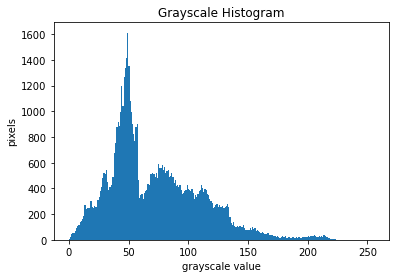

Histogram of girl-seq.vx image 3


In [6]:
# Exampe display of image sequence image and histogram
grls=vx.Vx('girl-seq.vx')
vd.dispmvx(grls.i[2], capt='girl-seq.vx image 3', size=0.5 )
vd.dhist(grls.i[2], capt='Histogram of girl-seq.vx image 3' )

4. How do you think the images in girl-seq.vx were created?

   The images are created by recursively applying bilinear interpolation to each pixels of the previous image. 

5. How do you explain the differences between the histograms of girl-grey.vx and girl-seq.vx image 3 ?

    Interpolation would provide a smoother color (here since it's grey-scale, it's intensity) gradient. The differences between nearby pixels' values are reduces. Therefore, in terms of histograms, the spikes will be smoothened as shown in image 1 to image 3 as interpolation repeated.

### G. Segmentation Using Thresholding


1.	What is the best threshold for the facsimile image?

    level = 213 is the best threshold

2.	What is your criterion for best threshold?
    
    This is when I think the image is at the clearest point. Specifically on this image, it would be every letter is clearest and easiest to read.
    
3.	What is the best threshold for the map image?

    level = 83

4.	What is your criterion for best threshold?

    lines are clear and connected, no black shading at the corner.

5.	What is the problem in thresholding the map image?
    
    It's hard to balance between making the image clear while not letting the corners getting darker.
    
6.	How might you get a better result on the map image? (That is, what kind of processing operations might improve the result?)

    Increasing the value of window would definitely help as we can see from the default image.

### H.   Edge Detection

<img src="caboose.png" width="100px" >

1.	Are all the edges detected by vedge?

    No, some are missing.

2.	Can you improve the result? (by using different options)

    After experimented, I found that changing the threshold or using vderiche can be helpful in improving the result

3.	What is an edge? (a) provide a definition for an edge:

    An edge is the boundary that shapes the object in terms of visual perception and usually appears with noticeable color/intensity changes in the image.
    
4.	Describe what you mean by edges in the context of the caboose image.

    Here in the image, the boundary of the car and the boundary of the rail should both be detected as edges. 

5. In a code cell use the a python utility program to display the caboose input image and the edge image result side by side.
    
   


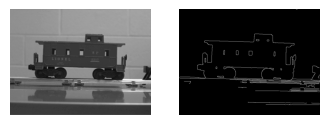

caboose: Original (left), Edge Detected (right)
<scaled size: (480 x 640) (480 x 640) >


In [11]:
caboose = vx.Vx('caboose.vx')
edge = vx.Vx('ecaboose5.vx')
vd.dispmvx(caboose, edge, capt='caboose: Original (left), Edge Detected (right)', size=0.5, axis=1)
